# Set-Based Neural Network Training with PyTorch

In this notebook, I will show you how to train a neural network using set-based computation. This is a simple example to show you how to use set-based data in PyTorch.

In [235]:
# Importing the libraries
from copy import deepcopy
import torch    
import numpy as np
import matplotlib.pyplot as plt
from SBRL import PyTorchZonotopeExtension as ptz

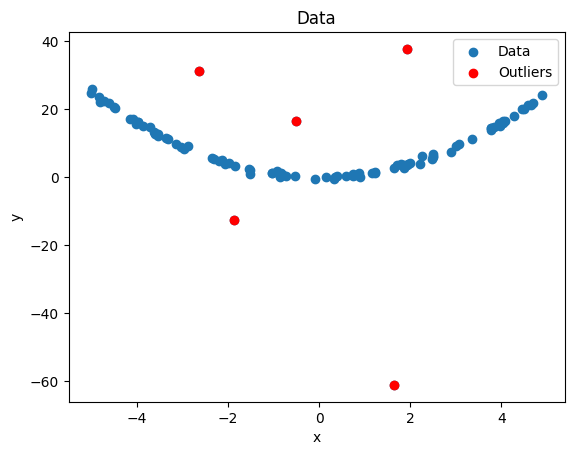

In [236]:
# Generating the input data
np.random.seed(1)
torch.manual_seed(1)

num_samples = 100

x = np.random.rand(num_samples, 1) * 10 - 5
y = x**2 + np.random.randn(num_samples, 1) * 0.5

# Add outliers
n_outliers = 5
indx_outliers = np.random.choice(num_samples, n_outliers)
y[indx_outliers, 0] += np.random.randn(n_outliers) * 50

# Plotting the data
plt.scatter(x, y, label='Data')
plt.scatter(x[indx_outliers], y[indx_outliers], color='red', label='Outliers')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()


In [237]:
# Initializing the model

nn = torch.nn.Sequential(
    torch.nn.Linear(1, 400),
    torch.nn.ReLU(),
    torch.nn.Linear(400, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 1)
)

In [238]:
# Training the model
# Use cuda if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Duplicating model
nn_point = deepcopy(nn)
nn_point = nn_point.to(device)
nn_set = deepcopy(nn)
nn_set = nn_set.to(device)

# Load the data
x = torch.tensor(x, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).to(device)

In [239]:
# Loss function
loss_point = torch.nn.MSELoss()
loss_set = ptz.core.ZonotopeRegressionLoss(.1,.01)

# Optimizer
optimizer_point = torch.optim.Adam(nn_point.parameters(), lr=0.01)
optimizer_set = torch.optim.Adam(nn_set.parameters(), lr=0.01)

# Training the model
nn_point_trained = ptz.functions.train(nn_point, loss_point, optimizer_point, x.t(), y.t(), 500, batchsize=64)
nn_set_trained = ptz.functions.train(nn_set, loss_set, optimizer_set, x.t(), y.t(), 500, batchsize=64, noise=0.01)

_____________________________________
 Neural Network Training Paramteres: 
-------------------------------------
Training Parameters:
	 Epochs   500
	 Batchsize   64
	 Perturbation Radius   0.0
______________________________________
|Epoch	|Time	|Loss
--------------------------------------
| 0 	|0.002 	|2e+02 	|
| 1 	|0.004 	|3e+01 	|
| 2 	|0.006 	|1e+02 	|
| 3 	|0.009 	|1e+02 	|
| 4 	|0.01 	|1e+02 	|
| 5 	|0.01 	|3e+01 	|
| 6 	|0.01 	|9e+01 	|
| 7 	|0.02 	|1e+02 	|
| 8 	|0.02 	|3e+01 	|
| 9 	|0.02 	|1e+02 	|
| 10 	|0.02 	|1e+01 	|
| 11 	|0.02 	|8e+01 	|
| 12 	|0.02 	|3e+01 	|
| 13 	|0.02 	|3e+01 	|
| 14 	|0.02 	|3e+01 	|
| 15 	|0.02 	|1e+02 	|
| 16 	|0.02 	|1e+02 	|
| 17 	|0.02 	|2e+01 	|
| 18 	|0.02 	|2e+01 	|
| 19 	|0.03 	|2e+01 	|
| 20 	|0.03 	|3e+01 	|
| 21 	|0.03 	|9e+01 	|
| 22 	|0.03 	|3e+01 	|
| 23 	|0.03 	|1e+02 	|
| 24 	|0.03 	|9e+01 	|
| 25 	|0.03 	|9e+01 	|
| 26 	|0.03 	|9e+01 	|
| 27 	|0.03 	|1e+02 	|
| 28 	|0.03 	|3e+01 	|
| 29 	|0.03 	|1e+02 	|
| 30 	|0.03 	|2e+01 	|
|

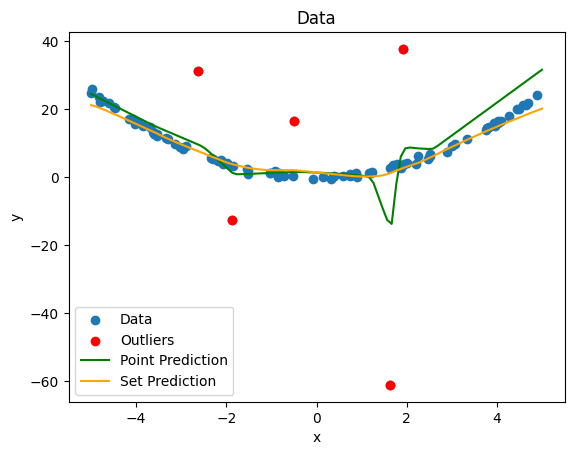

In [240]:
# Plotting the results

x_test = torch.linspace(-5, 5, 100).view(-1, 1).to(device)
y_pred_point = nn_point_trained(x_test)
y_pred_set = nn_set_trained(x_test)

plt.scatter(x.detach().cpu(), y.detach().cpu(), label='Data')
plt.scatter(x[indx_outliers].detach().cpu(), y[indx_outliers].detach().cpu(), color='red', label='Outliers')
plt.plot(x_test.detach().cpu(), y_pred_point.detach().cpu(), color ='green',label='Point Prediction')
plt.plot(x_test.detach().cpu(), y_pred_set.detach().cpu(), color = 'orange', label='Set Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()